In [1]:
# !pip install wand

In [2]:
from wand.image import Image as WImage
import os
import torch

## Inverse kinematics problem

The goal is to find configurations of a multi-jointed 2D arm that end in a given position.
The forward process takes a starting height $\xi_1$ and the three joint angles $\xi_2$, $\xi_3$, $\xi_4$, and returns the coordinate of the arm’s end point $f(\boldsymbol{\xi}) = [f_1(\boldsymbol{\xi}), f_2(\boldsymbol{\xi})]$ as 

$$f_1(\boldsymbol{\xi}) = l_1 \cos(\xi_2)+l_2 \cos(\xi_2+\xi_3)+l_3 \cos(\xi_2+\xi_3+\xi_4)$$
$$f_2(\boldsymbol{\xi}) = \xi_1+l_1 \sin(\xi_2)+l_2 \sin(\xi_2+\xi_3)+l_3 \sin(\xi_2+\xi_3+\xi_4)$$

with arm lengths $l_1=0.5,l_2=0.5,l_3=1.0$.

Parameters $\boldsymbol{\xi}$ follow a Gaussian prior $\boldsymbol{\xi} \sim \mathcal{N} (0, \boldsymbol{\sigma}^2.\textbf{I})$ with $\boldsymbol{\sigma} = [0.25, 0.5, 0.5, 0.5]$.The inverse problem is to find the distribution $p(\boldsymbol{\xi} | \textbf{y})$
of all arm configurations $\boldsymbol{\xi}$ that end at some observed 2D position $\textbf{y}$

### Formulation:
$$\textbf{y} = \text{observed variable}$$ 
$$\boldsymbol{\xi} = \text{latent variable}$$
$$\boldsymbol{\xi} \in 	\mathbb{R}^4, \ \textbf{y} \in \mathbb{R}^2 $$
$$p(\boldsymbol{\xi}|\textbf{y}) \propto p(\textbf{y}|\boldsymbol{\xi}) p(\boldsymbol{\xi})$$
$$\text{Prior: } p(\boldsymbol{\xi}) = \mathcal{N} (0, \boldsymbol{\sigma}^2.\textbf{I})$$
$$\text{Likelihood: } p(\textbf{y}|\boldsymbol{\xi}) =  \mathcal{N}(\textbf{y}| f(\boldsymbol{\xi}), \boldsymbol{\gamma}^2.\textbf{I}); \boldsymbol{\gamma} = [0.01, 0.01]$$

### Comparing our AVI (Full-rank Gaussian) and MCMC (NUTS) approaches

In [3]:
results_dir = os.path.join(os.getcwd(), 'results/')

0
Groundtruth:
 xi_data=[[ 0.3354301   0.8815546  -0.20953648 -0.42672086]],
 y_data=[[1.6788994 1.2767094]]


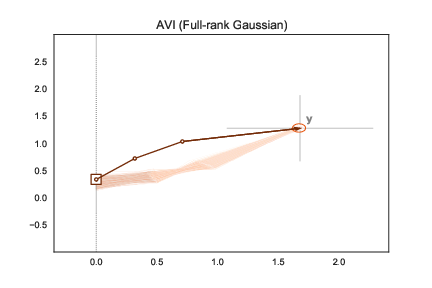

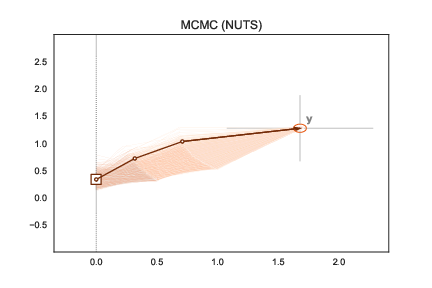

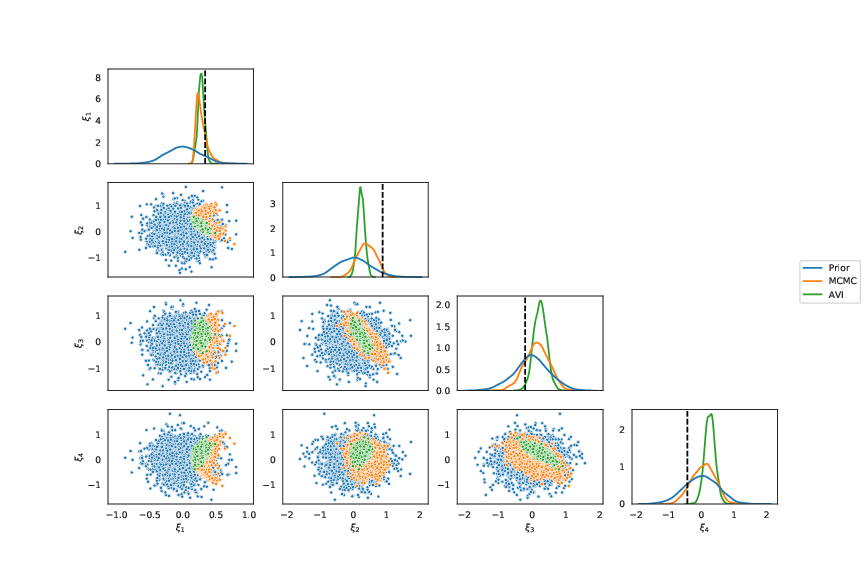

******************************************************************************************
1
Groundtruth:
 xi_data=[[-0.359544    0.24376169  0.18098028 -0.31118906]],
 y_data=[[1.913513  0.0772618]]


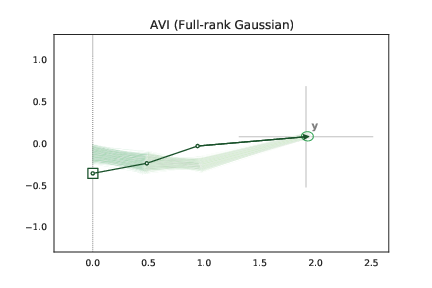

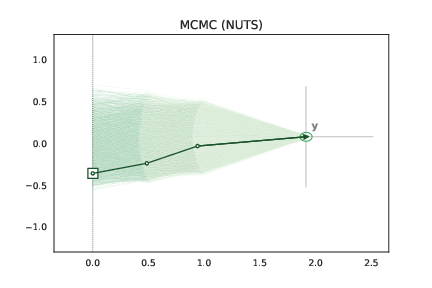

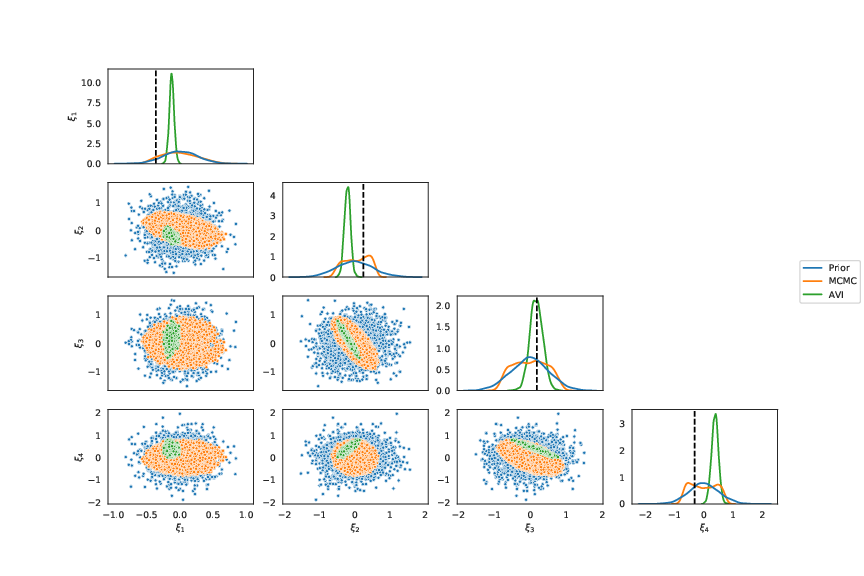

******************************************************************************************
2
Groundtruth:
 xi_data=[[ 0.00458185  0.87954867 -0.38375548 -0.9189032 ]],
 y_data=[[1.6667551 0.2016097]]


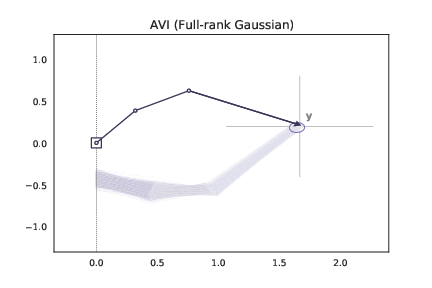

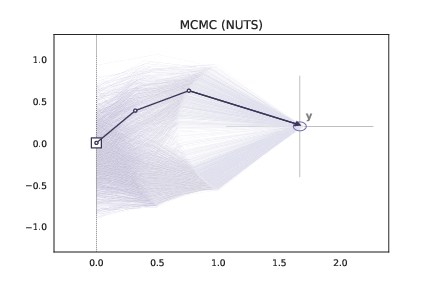

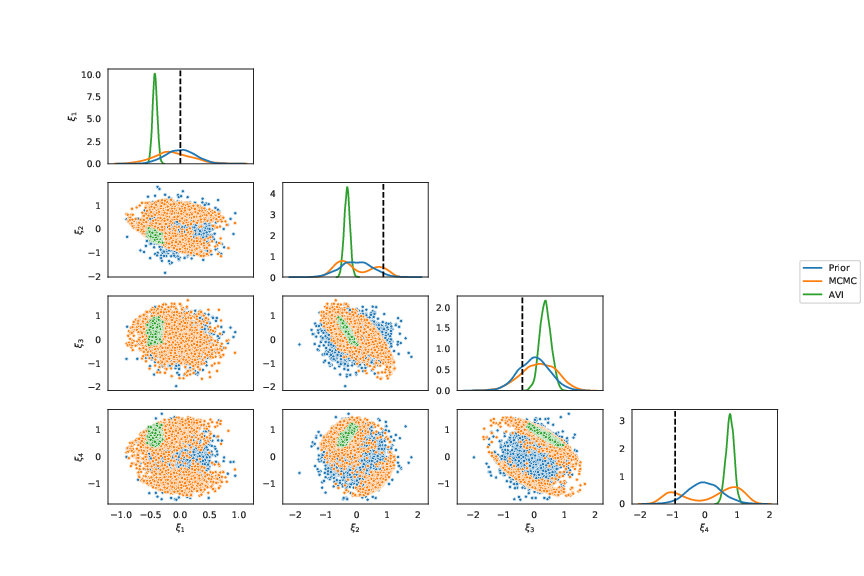

******************************************************************************************


In [4]:
xi_data_, y_data_ = torch.load(results_dir +'xi_data.pt'), torch.load(results_dir +'y_data.pt')

for j in range(3):
    print(j) 
    
    # Getting data
    xi_data, y_data = xi_data_[j].reshape(1,-1), y_data_[j].reshape(1,-1)
    print('Groundtruth:\n xi_data='+str(xi_data.data.numpy())+',\n y_data='+str(y_data.data.numpy()))
    
    display(WImage(filename=results_dir +str(j)+'_AVI'+'_plot.pdf'))
    display(WImage(filename=results_dir +str(j)+'_MCMC'+'_plot.pdf'))
    display(WImage(filename=results_dir +str(j)+'_pairplot.pdf'))
    print('*'*90) 